## Importing  all libraries

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
from PIL import Image
import numpy as np

In [71]:
from zipfile import ZipFile
import cv2
from google.colab.patches import cv2_imshow

In [60]:
import os
import glob as G
import tensorflow.keras.utils as plot_model

In [6]:
from sklearn.model_selection import train_test_split as tts
import tensorflow as tf
import tensorflow_hub as hub

## Loadind data from Kaggle with the token

In [12]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [13]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats

 99% 808M/812M [00:07<00:00, 218MB/s]
100% 812M/812M [00:07<00:00, 112MB/s]


## Unziping Dog vs Cats

In [9]:
main_address = '/content/dogs-vs-cats.zip'

In [14]:
with ZipFile(main_address) as Z:
  Z.extractall()

In [15]:
base_train_data = '/content/train.zip'
with ZipFile(base_train_data) as Z:
  Z.extractall()

In [16]:
base_path = '/content/train/'

In [17]:
file_names = os.listdir(base_path)

In [18]:
file_names[:11]

['cat.1656.jpg',
 'cat.12022.jpg',
 'dog.4851.jpg',
 'dog.7871.jpg',
 'cat.195.jpg',
 'dog.663.jpg',
 'cat.485.jpg',
 'dog.6217.jpg',
 'dog.994.jpg',
 'cat.2070.jpg',
 'cat.6384.jpg']

# Showing first 5 images without reshaping

In [19]:
file_names[0][0].upper()

'C'

In [20]:
base_path = '/content/train/'
file_names = os.listdir(base_path)
dogs = 0
cats = 0
lab_pre = []
for i in range (2000):
  l = file_names[i][0].upper()
  if l == 'D':
    dogs += 1
    lab_pre.append(1)
  else :
    cats += 1
    lab_pre.append(0)

In [21]:
dogs,cats

(990, 1010)

In [22]:
lab_pre[:11]

[0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0]

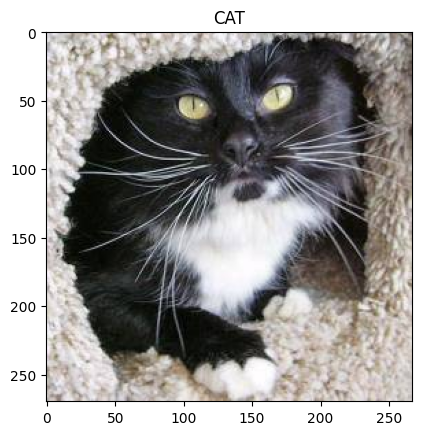

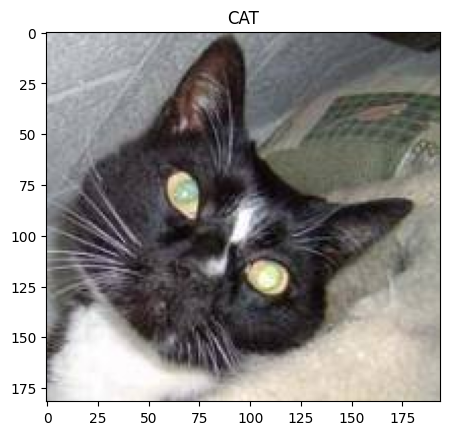

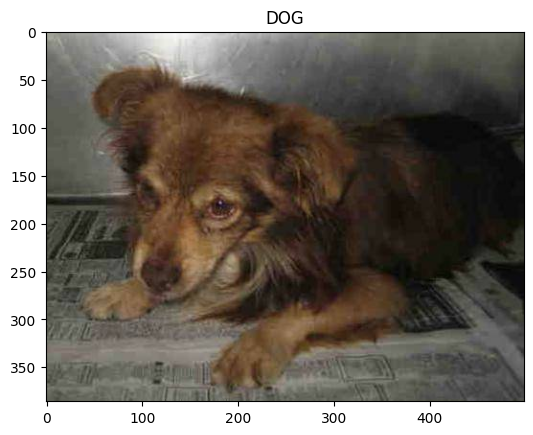

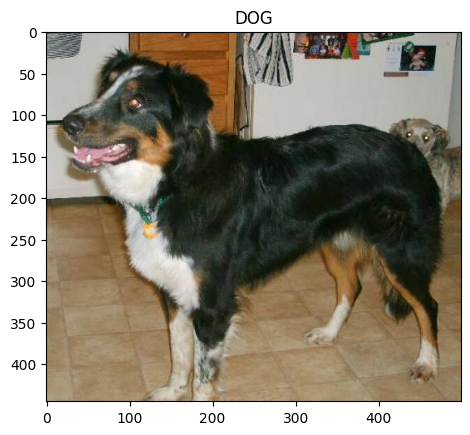

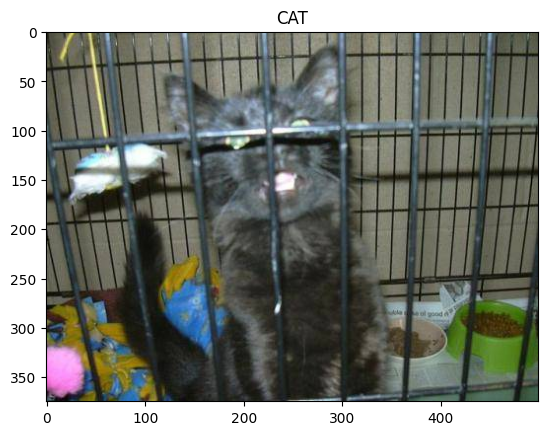

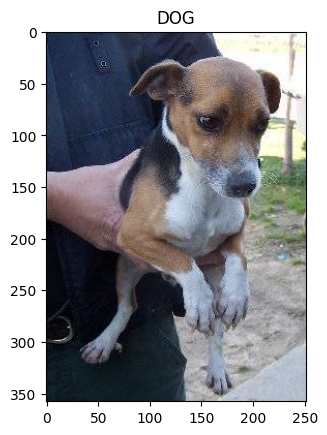

In [23]:
for i in range(6):
  test_img_pre = base_path + file_names[i]
  img = mpimg.imread(test_img_pre)
  if lab_pre[i]== 1:
    plt.title('DOG')
    plt.imshow(img)
    plt.show()
  else :
    plt.title('CAT')
    plt.imshow(img)
    plt.show()



In [24]:
test_img_pre = base_path + file_names[0]

In [25]:
test_img_pre

'/content/train/cat.1656.jpg'

# Resizing the images

In [26]:
resize_image_files = "/content/Image_Resized/"
os.mkdir(resize_image_files)

In [27]:
base_path = '/content/train/'

In [28]:
file_names = os.listdir(base_path)

In [29]:
for i in range(2000):
  file_names = os.listdir(base_path)[i]
  image_path_for_resize = base_path + file_names

  img = Image.open(image_path_for_resize)
  img = img.resize((224,224))
  img = img.convert('RGB')

  new_resized_path = resize_image_files+file_names
  img.save(new_resized_path)

In [35]:
RS = '/content/Image_Resized/'
RS_img_name = os.listdir(RS)

In [36]:
RS_img_name[:6]

['cat.1656.jpg',
 'cat.12022.jpg',
 'dog.4851.jpg',
 'dog.7871.jpg',
 'cat.195.jpg',
 'dog.663.jpg']

# Showing first 5 images after reshaping

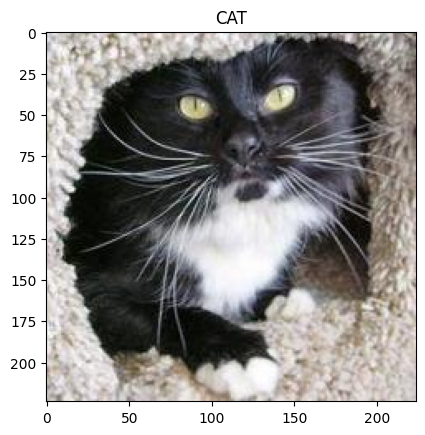

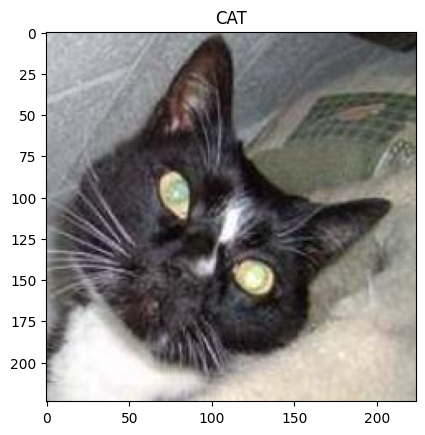

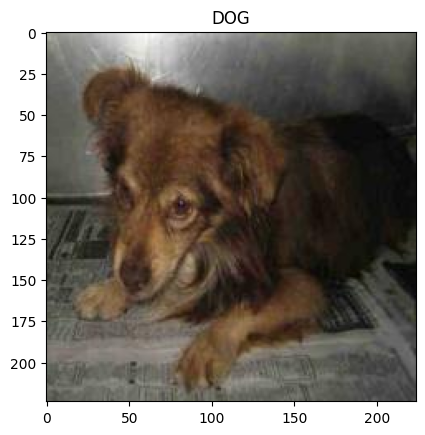

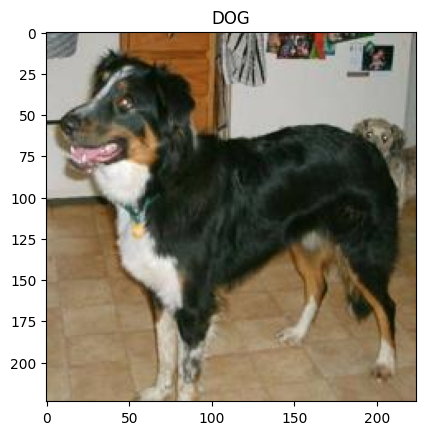

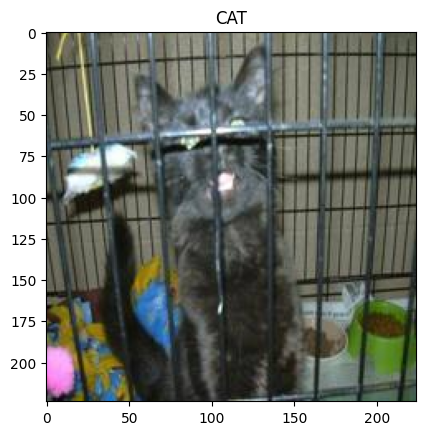

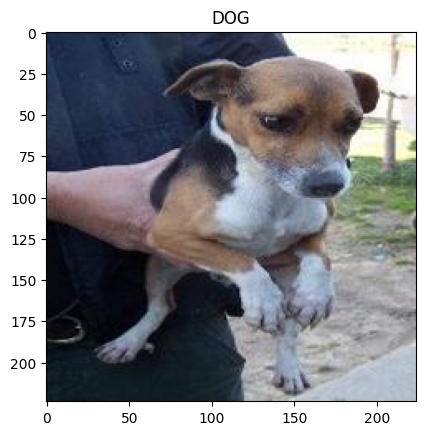

In [37]:
for i in range(6):
  test_img_post = RS + RS_img_name[i]
  img_post = mpimg.imread(test_img_post)
  if lab_pre[i]== 1:
    plt.title('DOG')
    plt.imshow(img_post)
    plt.show()
  else :
    plt.title('CAT')
    plt.imshow(img_post)
    plt.show()



# GLOBING
### as np.array

In [38]:
reshaped_image_directry = '/content/Image_Resized/'
image_extension = ['png','jpg']
files = []
[files.extend(G.glob(reshaped_image_directry+'*.'+e))for e in image_extension]
dog_cat_nu_val = np.asarray([cv2.imread(file)for file in files])

array([[[202, 197, 198],
        [226, 221, 222],
        [211, 206, 207],
        ...,
        [141, 152, 160],
        [114, 125, 133],
        [108, 119, 127]],

       [[211, 206, 207],
        [227, 222, 223],
        [211, 206, 207],
        ...,
        [138, 149, 157],
        [100, 111, 119],
        [ 76,  87,  95]],

       [[212, 207, 208],
        [222, 217, 218],
        [205, 200, 201],
        ...,
        [150, 159, 168],
        [105, 114, 123],
        [ 93, 102, 111]],

       ...,

       [[206, 210, 215],
        [186, 190, 195],
        [167, 171, 176],
        ...,
        [197, 200, 205],
        [189, 192, 197],
        [186, 189, 194]],

       [[180, 184, 189],
        [181, 185, 190],
        [181, 187, 192],
        ...,
        [196, 199, 204],
        [192, 195, 200],
        [192, 195, 200]],

       [[153, 157, 162],
        [176, 180, 185],
        [194, 200, 205],
        ...,
        [202, 205, 210],
        [202, 205, 210],
        [205, 208, 213]]], dtype=uint8)
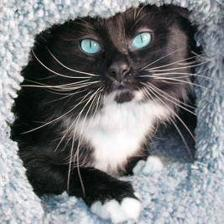

In [39]:
dog_cat_nu_val[0]

In [40]:
dog_cat_nu_val.shape

(2000, 224, 224, 3)

In [41]:
X = dog_cat_nu_val
Y = np.asarray(lab_pre)

In [42]:
X_train,X_test,Y_train,Y_test=tts(X,Y,test_size=0.2,random_state=42)

# Scaling The Data points

In [43]:
X_test_scaled = X_test/255
X_train_scaled = X_train/255

## Building the  Convolutional Neural Network

In [48]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [49]:
model = models.Sequential([
    layers.Input(shape=(224,224,3)),

    layers.Conv2D(32,(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPool2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPool2D(2,2),

    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(2, activation = 'softmax')
  ])

In [50]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [51]:
# Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     5,537,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,631,234 (21.48 MB)

 Trainable params: 5,631,234 (21.48 MB)

 Non-trainable params: 0 (0.00 B)

In [53]:
history = model.fit(X_train_scaled,Y_train,epochs=10,batch_size=32)

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 167s 3s/step - accuracy: 0.5082 - loss: 0.6934
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 202s 3s/step - accuracy: 0.6197 - loss: 0.6523
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 207s 3s/step - accuracy: 0.6894 - loss: 0.5695
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 201s 3s/step - accuracy: 0.7970 - loss: 0.4468
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 199s 3s/step - accuracy: 0.8354 - loss: 0.3552
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 208s 3s/step - accuracy: 0.9096 - loss: 0.2104
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 203s 3s/step - accuracy: 0.9505 - loss: 0.1483
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 170s 3s/step - accuracy: 0.9775 - loss: 0.0627
Epoch 9/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 170s 3s/step - accuracy: 0.9760 - loss: 0.0625
Epoch 10/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 174s 3s/step - accuracy: 0.9863 - loss: 0.0435


Text(0.5, 1.0, 'Accuracy')

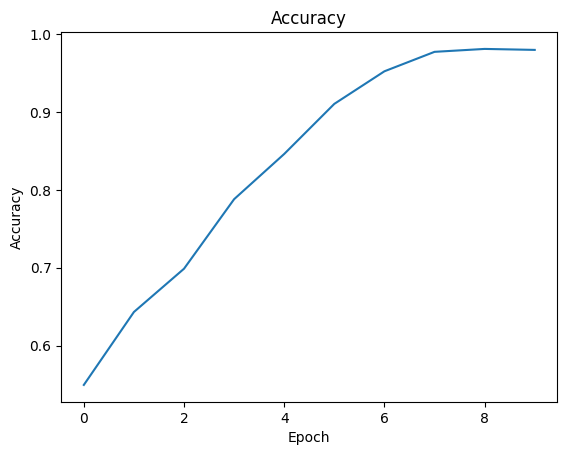

In [58]:
plt.plot(history.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Accuracy")

Text(0.5, 1.0, 'Accuracy')

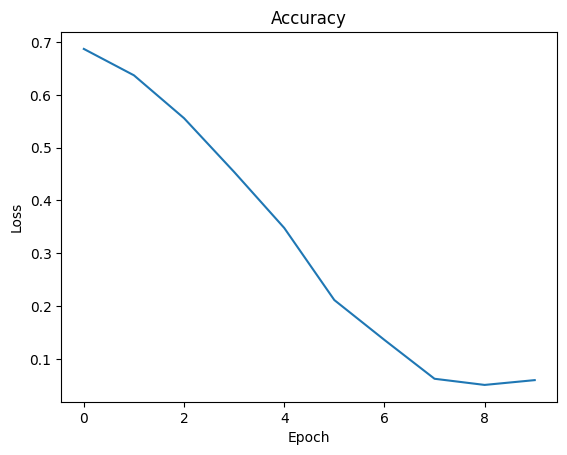

In [59]:
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Accuracy")

In [62]:
model.save('Predict_Dog_Cat.keras')

In [63]:
test = '/content/test1.zip'
with ZipFile(test,'r') as z:
  z.extractall()

In [115]:
test_base_path = '/content/test1/'

In [64]:
test_data_images = os.listdir('/content/test1')

In [66]:
test_data_images[:4]

['932.jpg', '8532.jpg', '8355.jpg', '1905.jpg']

In [ ]:
i_path = test_base_path + test_data_images[i]

In [123]:
# for i in range(10):
#   i_path = test_base_path + test_data_images[i]
#   input_image_path =    i_path
#   input_image =         cv2.imread(input_image_path)
#   input_image_resize =  cv2.resize(input_image, (224,224))
#   input_image_scaled =  input_image_resize/255
#   image_reshaped =      np.reshape(input_image_scaled, [1,224,224,3])
#   input_prediction =    model.predict(image_reshaped)
#   input_pred_label =    np.argmax(input_prediction)
#   print(input_pred_label)
#   input_image
#   cv2_imshow(input_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
ITS AN IMAGE OF A DOG


array([[[ 37,  44,  47],
        [ 35,  42,  45],
        [ 28,  37,  40],
        ...,
        [ 20,  19,  15],
        [  2,   1,   0],
        [ 10,   9,   5]],

       [[ 39,  46,  49],
        [ 36,  43,  46],
        [ 28,  37,  40],
        ...,
        [ 21,  20,  16],
        [  6,   5,   1],
        [ 14,  13,   9]],

       [[ 42,  49,  52],
        [ 36,  43,  46],
        [ 28,  37,  40],
        ...,
        [ 14,  13,   9],
        [  4,   3,   0],
        [ 13,  12,   8]],

       ...,

       [[162, 172, 182],
        [160, 170, 180],
        [160, 170, 180],
        ...,
        [142, 152, 162],
        [144, 154, 164],
        [145, 155, 165]],

       [[166, 175, 188],
        [163, 172, 185],
        [163, 173, 183],
        ...,
        [144, 154, 164],
        [144, 154, 164],
        [145, 155, 165]],

       [[170, 179, 192],
        [167, 176, 189],
        [166, 176, 186],
        ...,
        [146, 156, 166],
        [145, 155, 165],
        [145, 155, 165]]], dtype=uint8)
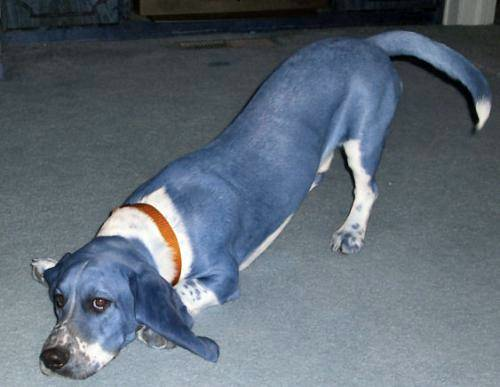

In [131]:
input_image_path =    '/content/test1/10015.jpg'
input_image =         cv2.imread(input_image_path)
input_image_resize =  cv2.resize(input_image, (224,224))
input_image_scaled =  input_image_resize/255
image_reshaped =      np.reshape(input_image_scaled, [1,224,224,3])
input_prediction =    model.predict(image_reshaped)
input_pred_label =    np.argmax(input_prediction)
input_pred_label
if input_pred_label == 1:
  print("ITS AN IMAGE OF A DOG")
else :
  print("ITS AN IMAGE OF A CAT")
input_image